In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# import the dataset

In [45]:
df=pd.read_csv("/content/Iris.csv")

# see basic information about the dataset

In [46]:
df.shape

(150, 5)

the iris dataset contains 150 ROWS annd 5 COLUMNS

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


the dataset contaning 4 numerical columns and 1 categorical column

In [48]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# basic statistics

In [50]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [51]:
#for categorical feature
df.describe(include="object")

,Species
count,150
unique,3
top,Iris-setosa
freq,50


# data cleaning

In [52]:
#checking for null values
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


there is no null values in dataset




In [53]:
#checking for duplicates
df.duplicated().value_counts()

,count
False,147
True,3


in dataset there is 3 duplicated values  so drop them

In [54]:
df.drop_duplicates(inplace=True)

In [55]:
df.duplicated().value_counts()

,count
False,147


In [56]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [57]:
X = df.drop('Species', axis=1) # Corrected column name and added axis=1
y = df['Species'] # Corrected column name
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [58]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [60]:
y_pred = knn.predict(X_test)

In [61]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



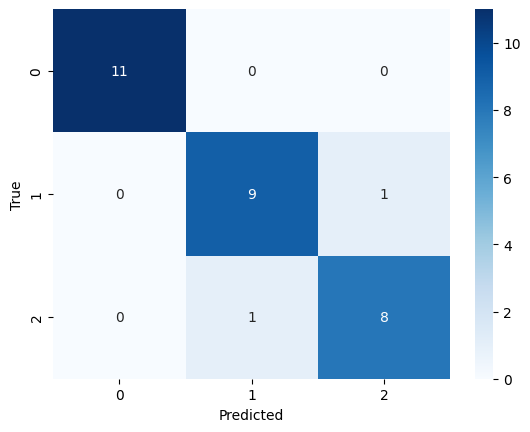

In [62]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [63]:
corr_matrix=df.corr(numeric_only=True)
corr_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


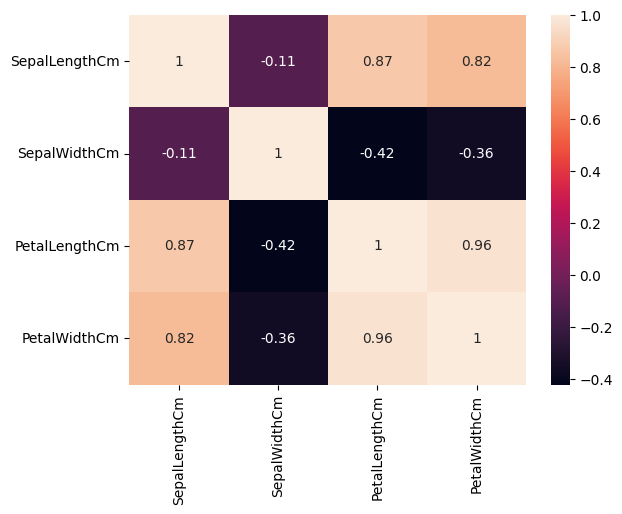

In [64]:
sns.heatmap(corr_matrix,annot=True)
plt.show()

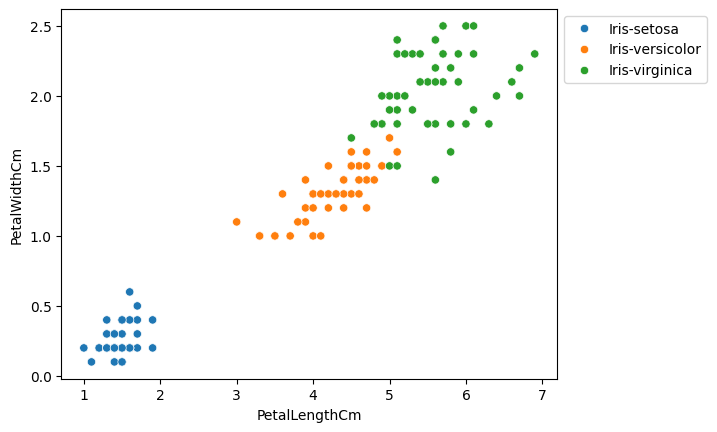

In [66]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',hue='Species', data=df, )
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()


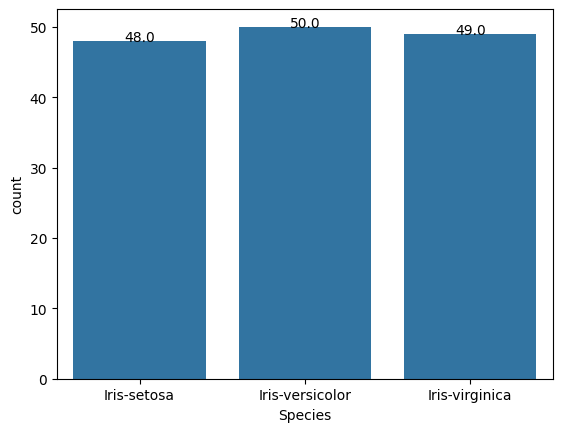

In [67]:
a=sns.countplot(x='Species', data=df, )
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()+0.5),ha='center',va='center')
plt.show()

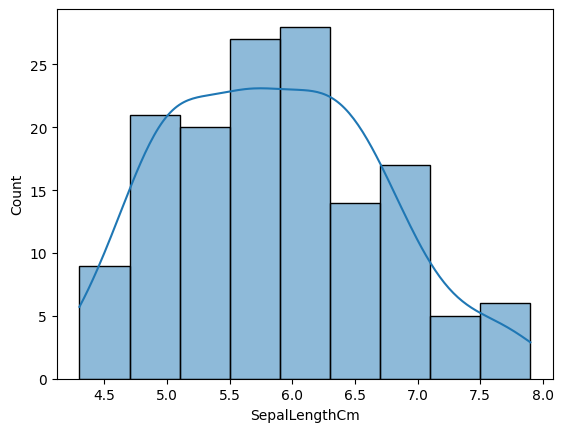

skewness: 0.29255956516307163
kurtosis: -0.5569564812003911


In [68]:
#univariate analysis
sns.histplot(x="SepalLengthCm",data=df,kde=True)
plt.show()
skewness=df["SepalLengthCm"].skew()
kurtosis=df["SepalLengthCm"].kurt()
print("skewness:",skewness)
print("kurtosis:",kurtosis)

sepal_length is +vely  skewed (right skew)

In [89]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        self.w_ = None
        self.errors_ = []

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after step function"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [93]:
def __init__(self, eta = 0.01, n_iter = 50, random_state =
1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1
    + X.shape[1])
    self.errors_ = []
    for _ in range(self.n_iter):
        errors = 0
        for xi, target in zip(X, y):
            update = self.eta * (target - self.predict(xi))
            self.w_[1:] += update * xi
            self.w_[0] += update
            errors += int(update != 0.0)
        self.errors_.append(errors)
    return self
def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.w_[1:]) + self.w_[0]
def predict(self, X):
    """return class label after unit setup"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

In [87]:
ppn = Perceptron(eta=0.1, n_iter=10)

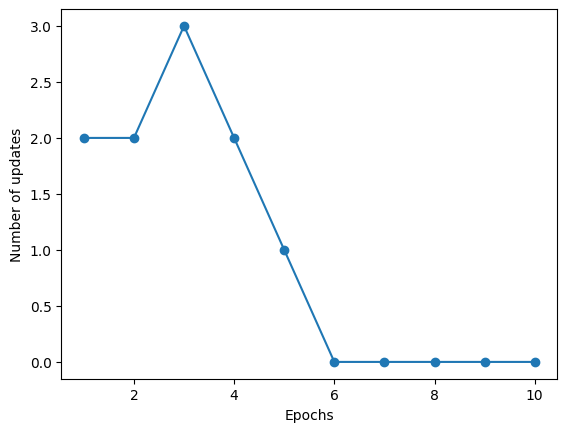

In [95]:
# Select only two classes for binary classification
X = df.iloc[0:100, [0, 2]].values
y = df.iloc[0:100, 4].values

# Encode the target variable to -1 and 1
y = np.where(y == 'Iris-setosa', -1, 1)

# Initialize and train the Perceptron model
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# Plot the errors
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

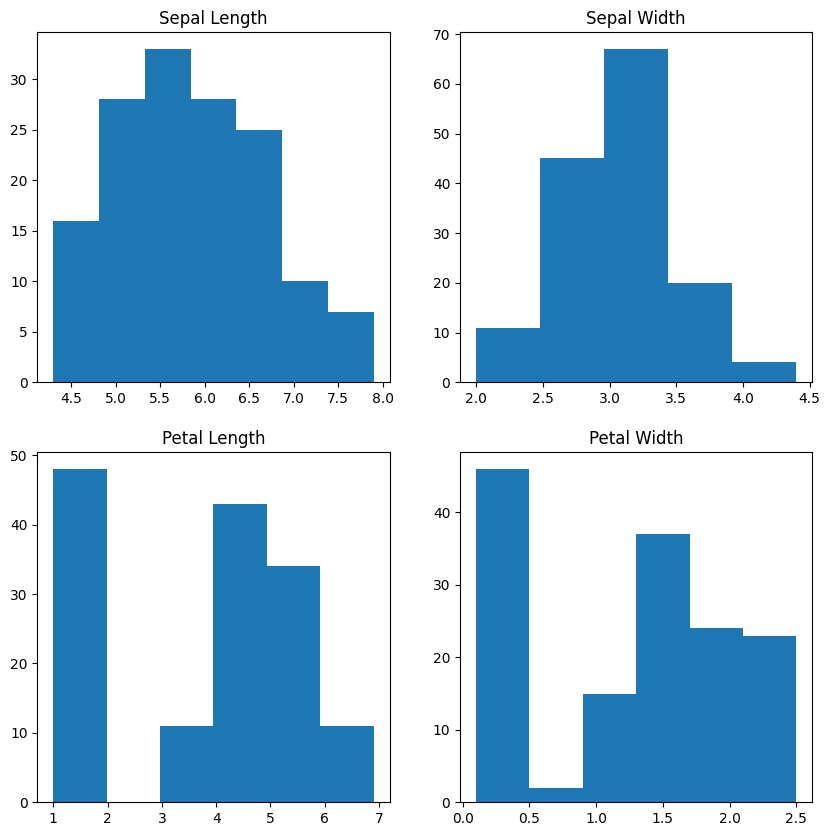

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['SepalLengthCm'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['SepalWidthCm'], bins=5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['PetalLengthCm'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['PetalWidthCm'], bins=6);

petl_length is -vely skewed means left skew

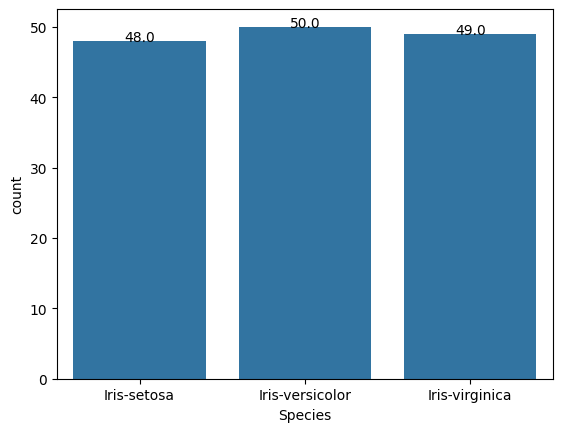

In [70]:
a=sns.countplot(x="Species",data=df)
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()+0.5),ha='center',va='center')
plt.show()

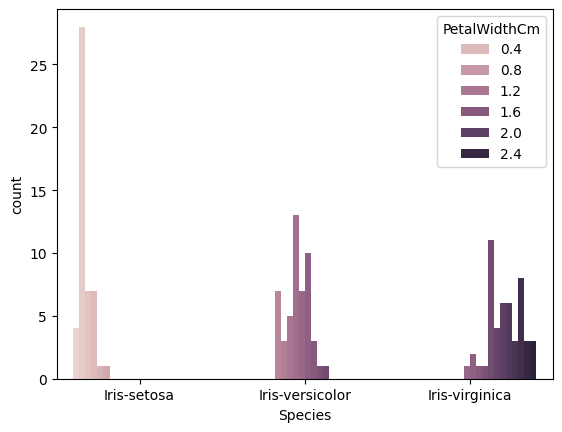

In [71]:
sns.countplot(x="Species",hue="PetalWidthCm",data=df)
plt.show()

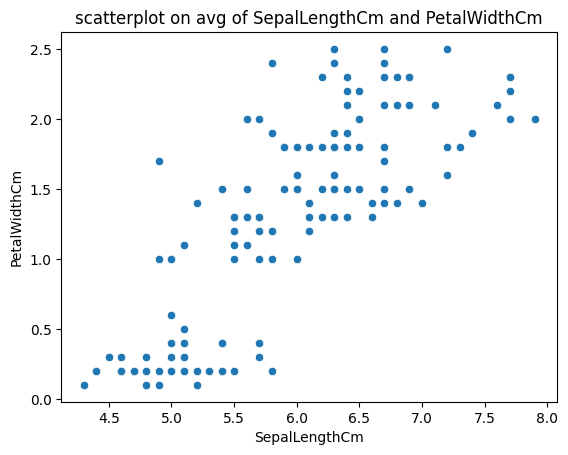

In [72]:
#numerical vs numerical
sns.scatterplot(x="SepalLengthCm",y="PetalWidthCm",data=df)
plt.xlabel("SepalLengthCm")
plt.ylabel("PetalWidthCm")
plt.title("scatterplot on avg of SepalLengthCm and PetalWidthCm")
plt.show()

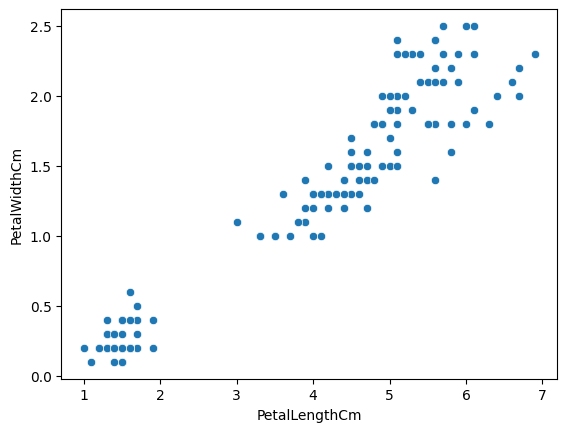

In [73]:
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm",data=df)
plt.show()

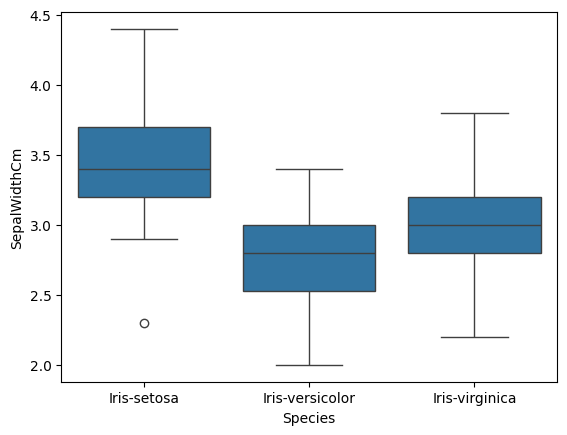

In [74]:
#numerical vs categorical
sns.boxplot(x="Species",y="SepalWidthCm",data=df)
plt.show()

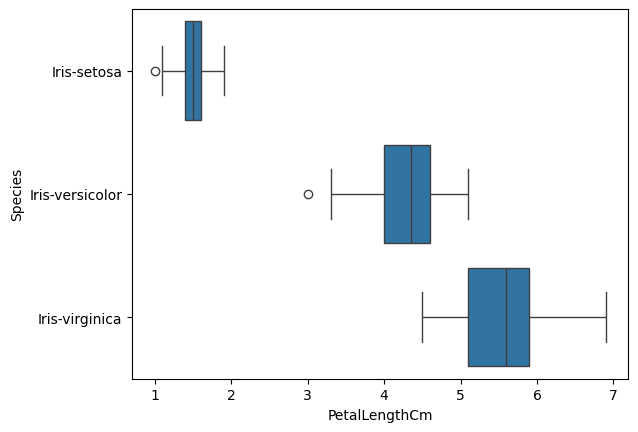

In [75]:
sns.boxplot(y="Species",x="PetalLengthCm",data=df)
plt.show()

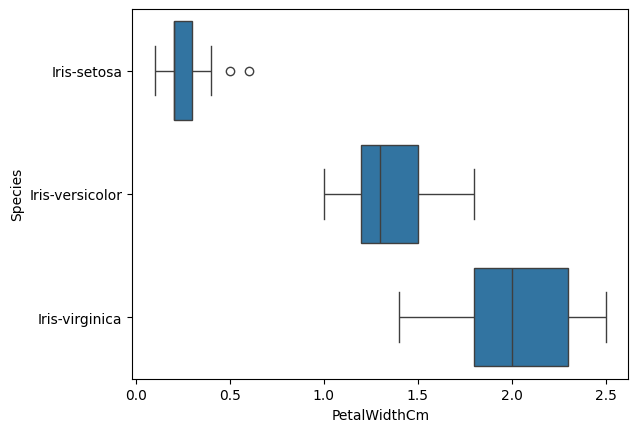

In [76]:
sns.boxplot(y="Species",x="PetalWidthCm",data=df)
plt.show()

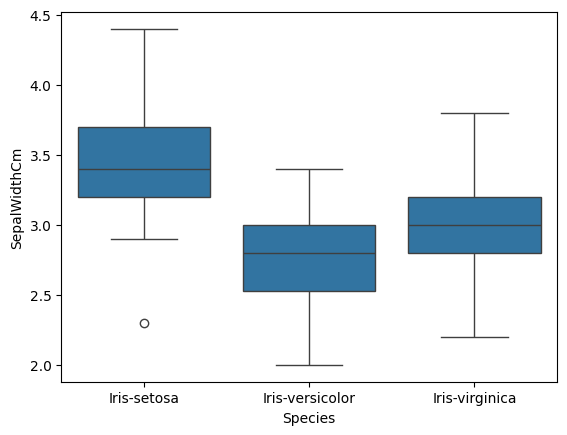

In [77]:
sns.boxplot(x="Species",y="SepalWidthCm",data=df)
plt.show()

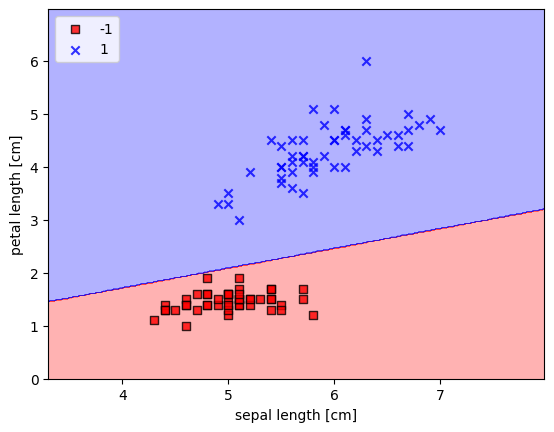

In [101]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,
    resolution),
    np.arange(x2_min, x2_max,
    resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())


    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')



# In [10]: # This line seems like a leftover from a different environment and should be removed
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show();

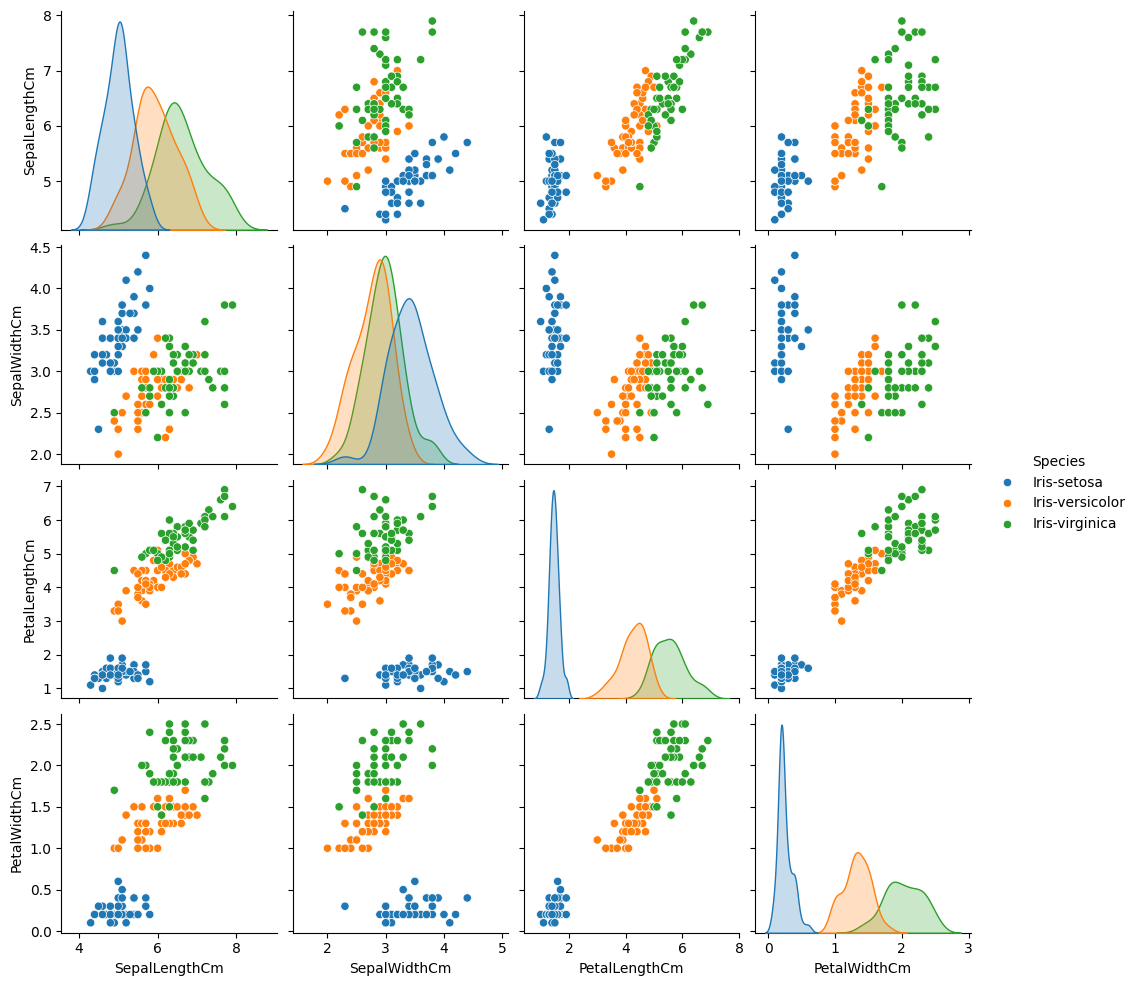

In [78]:
sns.pairplot(data=df,hue="Species")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

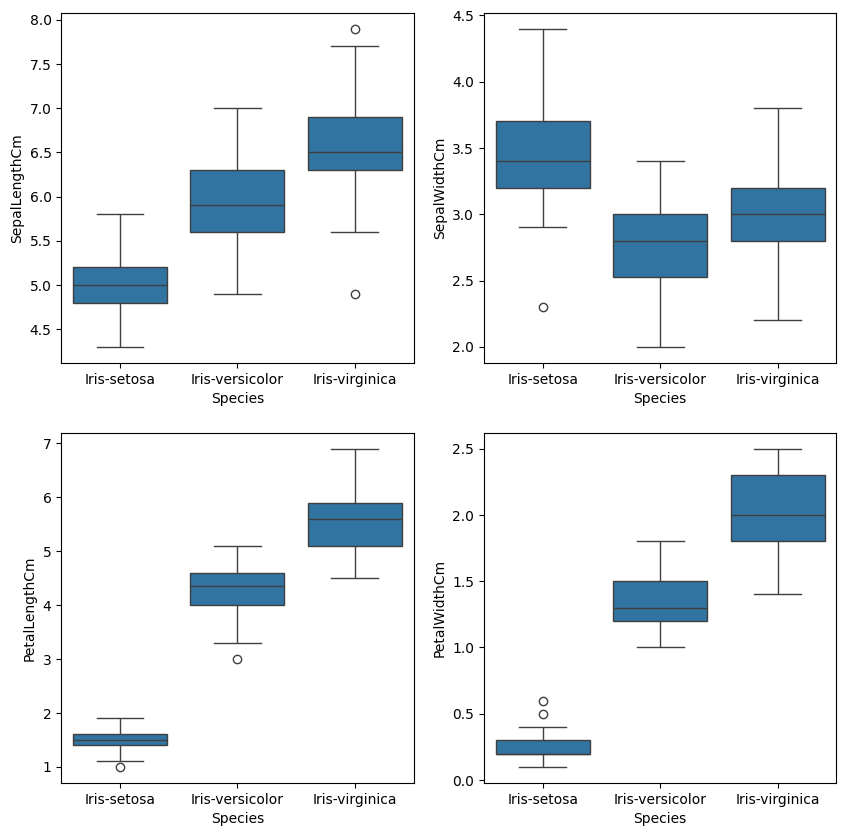

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
def graph(y):
    sns.boxplot(x="Species", y=y, data=df)
plt.figure(figsize=(10,10))
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('SepalLengthCm')
plt.subplot(222)
graph('SepalWidthCm')
plt.subplot(223)
graph('PetalLengthCm')
plt.subplot(224)
graph('PetalWidthCm')
plt.show